In [209]:
import pandas as pd

In [290]:
from pyecharts import options as opts
from pyecharts.charts import Pie, Bar, Map, Geo, Liquid, Line

In [4]:
gdp = pd.read_csv('GDP_data.csv')

In [5]:
country = pd.read_csv('Country_data.csv')

In [6]:
country_data = country.dropna(subset=['Income_Group'])

In [6]:
rank_cuntry = country_data.groupby('Income_Group').size()

In [7]:
# 各个收入等级分布
pie = Pie()
pie.add("", [list(z) for z in zip(rank_cuntry.index.tolist(), rank_cuntry.values.tolist())],
       radius=["30%", "75%"], center=["45%", "50%"], rosetype="radius",
       )
pie.set_global_opts(title_opts=opts.TitleOpts(title="各个收入等级分布"))
pie.set_series_opts(label_opts=opts.LabelOpts(formatter="{b}, {d}%"))
pie.render_notebook()

In [8]:
high = country_data[country_data['Income_Group'] == '高收入国家']

In [9]:
# 高收入国家2018年的GDP
high_gdp = pd.merge(high, gdp, how='inner')
high_gdp['2018'] = high_gdp['2018'].apply(lambda x: x/1000000000000)
high_gdp_top10 = high_gdp[['Country Name', 'Country Code', '2018']].sort_values(by='2018', ascending=False)[:10]

In [10]:
bar = Bar()
bar.add_xaxis(high_gdp_top10['Country Name'].values.tolist())
bar.add_yaxis("", high_gdp_top10['2018'].values.tolist())
bar.reversal_axis()
bar.set_series_opts(label_opts=opts.LabelOpts(position="right"))
bar.set_global_opts(title_opts=opts.TitleOpts(title="高收入国家GDP Top10", subtitle=""),
                   xaxis_opts=opts.AxisOpts(
                axislabel_opts=opts.LabelOpts(formatter="{value} /万亿")
            ),)
bar.render_notebook()

In [11]:
high_gdp_top20 = high_gdp[['Country Name', 'Country Code', '2018']].sort_values(by='2018', ascending=False)[:20]

bar = Bar()
bar.add_xaxis(high_gdp_top20['Country Name'].values.tolist())
bar.add_yaxis("", high_gdp_top20['2018'].values.tolist())
bar.reversal_axis()
bar.set_series_opts(label_opts=opts.LabelOpts(position="right"))
bar.set_global_opts(title_opts=opts.TitleOpts(title="高收入国家GDP Top20", subtitle=""),
                   xaxis_opts=opts.AxisOpts(
                axislabel_opts=opts.LabelOpts(formatter="{value} /万亿")
            ),)
bar.render_notebook()

In [233]:
world_gdp = 85.8
def liquid_base(country, gdp) -> Liquid:
    c = (
        Liquid()
        .add("lq", [gdp/world_gdp])
        .set_global_opts(title_opts=opts.TitleOpts(title="%s GDP 总量占比世界" % country))
    )
    return c

In [234]:
liquid_base("美国", 20.4941).render_notebook()

In [12]:
# 中高等收入国家
mid_high = country_data[country_data['Income_Group'] == '中高等收入国家']
mid_high_gdp = pd.merge(mid_high, gdp, how='inner')
mid_high_gdp['2018'] = mid_high_gdp['2018'].apply(lambda x: x/1000000000000)
mid_high_gdp_top10 = mid_high_gdp[['Country Name', 'Country Code', '2018']].sort_values(by='2018', ascending=False)[:10]
mid_high_gdp_top20 = mid_high_gdp[['Country Name', 'Country Code', '2018']].sort_values(by='2018', ascending=False)[:20]

In [13]:
bar = Bar()
bar.add_xaxis(mid_high_gdp_top10['Country Name'].values.tolist())
bar.add_yaxis("", mid_high_gdp_top10['2018'].values.tolist())
bar.reversal_axis()
bar.set_series_opts(label_opts=opts.LabelOpts(position="right"))
bar.set_global_opts(title_opts=opts.TitleOpts(title="中高等收入国家GDP Top10", subtitle=""),
                   xaxis_opts=opts.AxisOpts(
                axislabel_opts=opts.LabelOpts(formatter="{value} /万亿")
            ),)
bar.render_notebook()

In [235]:
liquid_base("中美", 34.1022).render_notebook()

In [14]:
bar = Bar()
bar.add_xaxis(mid_high_gdp_top20['Country Name'].values.tolist())
bar.add_yaxis("", mid_high_gdp_top20['2018'].values.tolist())
bar.reversal_axis()
bar.set_series_opts(label_opts=opts.LabelOpts(position="right"))
bar.set_global_opts(title_opts=opts.TitleOpts(title="中高等收入国家GDP Top20", subtitle=""),
                   xaxis_opts=opts.AxisOpts(
                axislabel_opts=opts.LabelOpts(formatter="{value} /万亿")
            ),)
bar.render_notebook()

In [15]:
# 中低等收入国家
mid_low = country_data[country_data['Income_Group'] == '中低等收入国家']
mid_low_gdp = pd.merge(mid_low, gdp, how='inner')
mid_low_gdp['2018'] = mid_low_gdp['2018'].apply(lambda x: x/1000000000000)
mid_low_gdp_top10 = mid_low_gdp[['Country Name', 'Country Code', '2018']].sort_values(by='2018', ascending=False)[:10]
mid_low_gdp_top20 = mid_low_gdp[['Country Name', 'Country Code', '2018']].sort_values(by='2018', ascending=False)[:20]

In [16]:
bar = Bar()
bar.add_xaxis(mid_low_gdp_top10['Country Name'].values.tolist())
bar.add_yaxis("", mid_low_gdp_top10['2018'].values.tolist())
bar.reversal_axis()
bar.set_series_opts(label_opts=opts.LabelOpts(position="right"))
bar.set_global_opts(title_opts=opts.TitleOpts(title="中低等收入国家GDP Top10", subtitle=""),
                   xaxis_opts=opts.AxisOpts(
                axislabel_opts=opts.LabelOpts(formatter="{value} /万亿")
            ),)
bar.render_notebook()

In [17]:
bar = Bar()
bar.add_xaxis(mid_low_gdp_top20['Country Name'].values.tolist())
bar.add_yaxis("", mid_low_gdp_top20['2018'].values.tolist())
bar.reversal_axis()
bar.set_series_opts(label_opts=opts.LabelOpts(position="right"))
bar.set_global_opts(title_opts=opts.TitleOpts(title="中低等收入国家GDP Top20", subtitle=""),
                   xaxis_opts=opts.AxisOpts(
                axislabel_opts=opts.LabelOpts(formatter="{value} /万亿")
            ),)
bar.render_notebook()

In [18]:
# 低等收入国家
low = country_data[country_data['Income_Group'] == '低收入国家']
low_gdp = pd.merge(low, gdp, how='inner')
low_gdp['2018'] = low_gdp['2018'].apply(lambda x: x/1000000000000)
low_gdp_top10 = low_gdp[['Country Name', 'Country Code', '2018']].sort_values(by='2018', ascending=False)[:10]
low_gdp_top20 = low_gdp[['Country Name', 'Country Code', '2018']].sort_values(by='2018', ascending=False)[:20]

In [19]:
bar = Bar()
bar.add_xaxis(low_gdp_top10['Country Name'].values.tolist())
bar.add_yaxis("", low_gdp_top10['2018'].values.tolist())
bar.reversal_axis()
bar.set_series_opts(label_opts=opts.LabelOpts(position="right"))
bar.set_global_opts(title_opts=opts.TitleOpts(title="低等收入国家GDP Top10", subtitle=""),
                   xaxis_opts=opts.AxisOpts(
                axislabel_opts=opts.LabelOpts(formatter="{value} /万亿")
            ),)
bar.render_notebook()

In [20]:
bar = Bar()
bar.add_xaxis(low_gdp_top20['Country Name'].values.tolist())
bar.add_yaxis("", low_gdp_top20['2018'].values.tolist())
bar.reversal_axis()
bar.set_series_opts(label_opts=opts.LabelOpts(position="right"))
bar.set_global_opts(title_opts=opts.TitleOpts(title="低等收入国家GDP Top20", subtitle=""),
                   xaxis_opts=opts.AxisOpts(
                axislabel_opts=opts.LabelOpts(formatter="{value} /万亿")
            ),)
bar.render_notebook()

In [7]:
country_gdp = pd.merge(country_data, gdp, how='inner')

In [94]:
country_gdp

,Country Name,Country Code,Region,Income_Group,Unnamed: 4,Indicator Name,Indicator Code,1960,1961,1962,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,阿鲁巴,ABW,NaN,高收入国家,NaN,GDP（现价美元）,NY.GDP.MKTP.CD,NaN,NaN,NaN,...,0.002550,0.002535,0.002582,0.002650,0.002692,0.002647,0.002701,NaN,NaN,NaN
1,阿富汗,AFG,南亚,低收入国家,NaN,GDP（现价美元）,NY.GDP.MKTP.CD,0.000538,0.000549,0.000547,...,0.017804,0.020002,0.020561,0.020485,0.019907,0.019363,0.020192,0.019363,NaN,NaN
2,安哥拉,AGO,撒哈拉以南非洲地区（不包括高收入）,中低等收入国家,NaN,GDP（现价美元）,NY.GDP.MKTP.CD,NaN,NaN,NaN,...,0.111790,0.128053,0.136710,0.145712,0.116194,0.101124,0.122124,0.105751,NaN,NaN
3,阿尔巴尼亚,ALB,欧洲与中亚地区（不包括高收入）,中高等收入国家,NaN,GDP（现价美元）,NY.GDP.MKTP.CD,NaN,NaN,NaN,...,0.012891,0.012320,0.012776,0.013228,0.011387,0.011861,0.013025,0.015059,NaN,NaN
4,安道尔共和国,AND,NaN,高收入国家,NaN,GDP（现价美元）,NY.GDP.MKTP.CD,NaN,NaN,NaN,...,0.003442,0.003165,0.003282,0.003351,0.002811,0.002877,0.003013,0.003237,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,科索沃,XKX,欧洲与中亚地区（不包括高收入）,中高等收入国家,NaN,GDP（现价美元）,NY.GDP.MKTP.CD,NaN,NaN,NaN,...,0.006692,0.006500,0.007072,0.007387,0.006441,0.006715,0.007228,0.007900,NaN,NaN
212,也门共和国,YEM,中东与北非地区（不包括高收入）,低收入国家,NaN,GDP（现价美元）,NY.GDP.MKTP.CD,NaN,NaN,NaN,...,0.032726,0.035401,0.040415,0.043229,0.042628,0.030968,0.026819,0.026914,NaN,NaN
213,南非,ZAF,撒哈拉以南非洲地区（不包括高收入）,中高等收入国家,NaN,GDP（现价美元）,NY.GDP.MKTP.CD,0.007575,0.007973,0.008498,...,0.416417,0.396329,0.366645,0.350638,0.317416,0.296341,0.349268,0.368288,NaN,NaN
214,赞比亚,ZMB,撒哈拉以南非洲地区（不包括高收入）,中低等收入国家,NaN,GDP（现价美元）,NY.GDP.MKTP.CD,0.000713,0.000696,0.000693,...,0.023460,0.025503,0.028045,0.027151,0.021154,0.020955,0.025868,0.026720,NaN,NaN


In [66]:
country_gdp[['Country Name', 'Country Code', '2018']].sort_values(by='2018', ascending=False)[:60]

,Country Name,Country Code,2018
202,美国,USA,20.494100
36,中国,CHN,13.608152
97,日本,JPN,4.970916
50,德国,DEU,3.996759
68,英国,GBR,2.825208
64,法国,FRA,2.777535
89,印度,IND,2.726323
94,意大利,ITA,2.073902
26,巴西,BRA,1.868626
32,加拿大,CAN,1.712510


In [93]:
# 查看倒数排名
country_gdp.dropna(subset=['2018'])[['Country Name', 'Country Code', '2018']].sort_values(by='2018', ascending=False)[-20:]

,Country Name,Country Code,2018
9,安提瓜和巴布达,ATG,0.001624
184,塞舌尔,SYC,0.001590
74,几内亚比绍共和国,GNB,0.001458
170,所罗门群岛,SLB,0.001412
77,格林纳达,GRD,0.001207
42,科摩罗,COM,0.001203
103,圣基茨和尼维斯,KNA,0.001040
186,特克斯科斯群岛,TCA,0.001022
209,瓦努阿图,VUT,0.000888
210,萨摩亚,WSM,0.000861


In [8]:
# GDP转换成万亿单位
for i in range(1960, 2019):
    country_gdp[str(i)] = country_gdp[str(i)].apply(lambda x: x/1000000000000)

country_gdp

,Country Name,Country Code,Region,Income_Group,Unnamed: 4,Indicator Name,Indicator Code,1960,1961,1962,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,阿鲁巴,ABW,NaN,高收入国家,NaN,GDP（现价美元）,NY.GDP.MKTP.CD,NaN,NaN,NaN,...,0.002550,0.002535,0.002582,0.002650,0.002692,0.002647,0.002701,NaN,NaN,NaN
1,阿富汗,AFG,南亚,低收入国家,NaN,GDP（现价美元）,NY.GDP.MKTP.CD,0.000538,0.000549,0.000547,...,0.017804,0.020002,0.020561,0.020485,0.019907,0.019363,0.020192,0.019363,NaN,NaN
2,安哥拉,AGO,撒哈拉以南非洲地区（不包括高收入）,中低等收入国家,NaN,GDP（现价美元）,NY.GDP.MKTP.CD,NaN,NaN,NaN,...,0.111790,0.128053,0.136710,0.145712,0.116194,0.101124,0.122124,0.105751,NaN,NaN
3,阿尔巴尼亚,ALB,欧洲与中亚地区（不包括高收入）,中高等收入国家,NaN,GDP（现价美元）,NY.GDP.MKTP.CD,NaN,NaN,NaN,...,0.012891,0.012320,0.012776,0.013228,0.011387,0.011861,0.013025,0.015059,NaN,NaN
4,安道尔共和国,AND,NaN,高收入国家,NaN,GDP（现价美元）,NY.GDP.MKTP.CD,NaN,NaN,NaN,...,0.003442,0.003165,0.003282,0.003351,0.002811,0.002877,0.003013,0.003237,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,科索沃,XKX,欧洲与中亚地区（不包括高收入）,中高等收入国家,NaN,GDP（现价美元）,NY.GDP.MKTP.CD,NaN,NaN,NaN,...,0.006692,0.006500,0.007072,0.007387,0.006441,0.006715,0.007228,0.007900,NaN,NaN
212,也门共和国,YEM,中东与北非地区（不包括高收入）,低收入国家,NaN,GDP（现价美元）,NY.GDP.MKTP.CD,NaN,NaN,NaN,...,0.032726,0.035401,0.040415,0.043229,0.042628,0.030968,0.026819,0.026914,NaN,NaN
213,南非,ZAF,撒哈拉以南非洲地区（不包括高收入）,中高等收入国家,NaN,GDP（现价美元）,NY.GDP.MKTP.CD,0.007575,0.007973,0.008498,...,0.416417,0.396329,0.366645,0.350638,0.317416,0.296341,0.349268,0.368288,NaN,NaN
214,赞比亚,ZMB,撒哈拉以南非洲地区（不包括高收入）,中低等收入国家,NaN,GDP（现价美元）,NY.GDP.MKTP.CD,0.000713,0.000696,0.000693,...,0.023460,0.025503,0.028045,0.027151,0.021154,0.020955,0.025868,0.026720,NaN,NaN


In [99]:
# 2018年GDP前十名
country_gdp_top10 = country_gdp[['Country Name', 'Country Code', '2018']].sort_values(by='2018', ascending=False)[:10]

In [101]:
bar = Bar()
bar.add_xaxis(country_gdp_top10['Country Name'].values.tolist())
bar.add_yaxis("", country_gdp_top10['2018'].values.tolist())
bar.reversal_axis()
bar.set_series_opts(label_opts=opts.LabelOpts(position="right"))
bar.set_global_opts(title_opts=opts.TitleOpts(title="2018年GDP Top10", subtitle=""),
                   xaxis_opts=opts.AxisOpts(
                axislabel_opts=opts.LabelOpts(formatter="{value} /万亿")
            ),)
bar.render_notebook()

In [278]:
# top20 国家历年GDP
country_gdp_top20 = country_gdp.drop(columns=['Region', 'Income_Group', 'Unnamed: 4', 'Indicator Name', 'Indicator Code', '2019', 'Unnamed: 64']).sort_values(by='2018', ascending=False)[:20]
# GDP转换成万亿单位
for i in range(1960, 2019):
    country_gdp_top20[str(i)] = country_gdp_top20[str(i)].apply(lambda x: x*1000000000000)

country_gdp_top20

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
202,美国,USA,5.433000e+11,5.633000e+11,6.051000e+11,6.386000e+11,6.858000e+11,7.437000e+11,8.150000e+11,8.617000e+11,...,1.444893e+13,1.499205e+13,1.554258e+13,1.619701e+13,1.678485e+13,1.752175e+13,1.821930e+13,1.870719e+13,1.948539e+13,2.049410e+13
36,中国,CHN,5.971647e+10,5.005687e+10,4.720936e+10,5.070680e+10,5.970834e+10,7.043627e+10,7.672029e+10,7.288163e+10,...,5.101702e+12,6.087165e+12,7.551500e+12,8.532231e+12,9.570406e+12,1.043853e+13,1.101554e+13,1.113795e+13,1.214349e+13,1.360815e+13
97,日本,JPN,4.430734e+10,5.350862e+10,6.072302e+10,6.949813e+10,8.174901e+10,9.095028e+10,1.056281e+11,1.237819e+11,...,5.231383e+12,5.700098e+12,6.157460e+12,6.203213e+12,5.155717e+12,4.850414e+12,4.389476e+12,4.926667e+12,4.859951e+12,4.970916e+12
50,德国,DEU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.418005e+12,3.417095e+12,3.757698e+12,3.543984e+12,3.752514e+12,3.898727e+12,3.381389e+12,3.495163e+12,3.693204e+12,3.996759e+12
68,英国,GBR,7.232805e+10,7.669436e+10,8.060194e+10,8.544377e+10,9.338760e+10,1.005958e+11,1.070907e+11,1.111854e+11,...,2.394786e+12,2.452900e+12,2.634896e+12,2.676605e+12,2.753565e+12,3.034729e+12,2.896421e+12,2.659239e+12,2.637866e+12,2.825208e+12
64,法国,FRA,6.265147e+10,6.834674e+10,7.631378e+10,8.555111e+10,9.490659e+10,1.021606e+11,1.105975e+11,1.194661e+11,...,2.690222e+12,2.642610e+12,2.861408e+12,2.683825e+12,2.811078e+12,2.852166e+12,2.438208e+12,2.471286e+12,2.586285e+12,2.777535e+12
89,印度,IND,3.702988e+10,3.923244e+10,4.216148e+10,4.842192e+10,5.648029e+10,5.955486e+10,4.586546e+10,5.013494e+10,...,1.341887e+12,1.675615e+12,1.823050e+12,1.827638e+12,1.856722e+12,2.039127e+12,2.103588e+12,2.290432e+12,2.652551e+12,2.726323e+12
94,意大利,ITA,4.038529e+10,4.484276e+10,5.038389e+10,5.771074e+10,6.317542e+10,6.797815e+10,7.365487e+10,8.113312e+10,...,2.185160e+12,2.125058e+12,2.276292e+12,2.072823e+12,2.130491e+12,2.151733e+12,1.832273e+12,1.869202e+12,1.946570e+12,2.073902e+12
26,巴西,BRA,1.516557e+10,1.523685e+10,1.992629e+10,2.302148e+10,2.121189e+10,2.179004e+10,2.706272e+10,3.059183e+10,...,1.667020e+12,2.208872e+12,2.616202e+12,2.465189e+12,2.472806e+12,2.455994e+12,1.802214e+12,1.796275e+12,2.053595e+12,1.868626e+12
32,加拿大,CAN,NaN,4.155599e+10,4.286809e+10,4.571315e+10,5.012664e+10,5.534224e+10,6.201517e+10,6.666493e+10,...,1.371153e+12,1.613543e+12,1.789141e+12,1.823967e+12,1.842018e+12,1.801480e+12,1.552900e+12,1.526706e+12,1.646867e+12,1.712510e+12


In [279]:
country_list = []
year_list = []
value_list = []
type_list = []
c_list = ['美国', '中国', '日本', '德国', '英国', '法国', '印度', '意大利', '巴西', '加拿大', '俄罗斯联邦', '大韩民国', '澳大利亚', 
          '西班牙', '墨西哥', '印度尼西亚', '荷兰', '沙特阿拉伯', '土耳其', '瑞士']
for c in c_list:
    for i in range(1960, 2019):
        country_list.append(c)
        type_list.append(country_gdp_top20[country_gdp_top20['Country Name'] == c]['Country Code'].values.tolist()[0])
        value_list.append(country_gdp_top20[country_gdp_top20['Country Name'] == c][str(i)].values.tolist()[0])
        year_list.append(str(i))

print(len(value_list))
print(len(country_list))
d = {'name': country_list, 'type': type_list, 'value': value_list, 'date': year_list}
pd.DataFrame(d).to_csv('auto_gdp.csv', index=0)

1180
1180


In [241]:
# 2018年GDP后十名
country_gdp_bottom10 = country_gdp.dropna(subset=['2018'])[['Country Name', 'Country Code', '2018']].sort_values(by='2018', ascending=False)[-10:]

In [105]:
bar = Bar()
bar.add_xaxis(country_gdp_bottom10['Country Name'].values.tolist())
bar.add_yaxis("", country_gdp_bottom10['2018'].values.tolist())
bar.reversal_axis()
bar.set_series_opts(label_opts=opts.LabelOpts(position="right"))
bar.set_global_opts(title_opts=opts.TitleOpts(title="2018年GDP bottom10", subtitle=""),
                   xaxis_opts=opts.AxisOpts(
                axislabel_opts=opts.LabelOpts(formatter="{value} /万亿")
            ),)
bar.render_notebook()

In [ ]:
#############################
# 历年GDP倒数分析

In [174]:
df_tuwalu = country_gdp[country_gdp['Country Name']=='图瓦卢']

df_naolu = country_gdp[country_gdp['Country Name']=='瑙魯']

df_jilibasi = country_gdp[country_gdp['Country Name']=='基里巴斯']

df_mashaoerqundao = country_gdp[country_gdp['Country Name']=='马绍尔群岛']
    
df_palao = country_gdp[country_gdp['Country Name']=='帕劳']

In [178]:
tuwalu_gdp = df_tuwalu[year_str].values.tolist()[0]
naolu_gdp = df_naolu[year_str].values.tolist()[0]
jilibasi_gdp = df_jilibasi[year_str].values.tolist()[0]
mashaoerqundao_gdp = df_mashaoerqundao[year_str].values.tolist()[0]
palao_gdp = df_palao[year_str].values.tolist()[0]

In [ ]:
#############################
# 历年GDP正数分析

In [176]:
df_china = country_gdp[country_gdp['Country Name']=='中国']

df_usa = country_gdp[country_gdp['Country Name']=='美国']

df_jpn = country_gdp[country_gdp['Country Name']=='日本']

df_de = country_gdp[country_gdp['Country Name']=='德国']

df_uk = country_gdp[country_gdp['Country Name']=='英国']

In [177]:
year_str = [str(i) for i in range(1960, 2019)]

china_gdp = df_china[year_str].values.tolist()[0]
usa_gdp = df_usa[year_str].values.tolist()[0]
jpn_gdp = df_jpn[year_str].values.tolist()[0]
de_gdp = df_de[year_str].values.tolist()[0]
uk_gdp = df_uk[year_str].values.tolist()[0]


In [118]:
from pyecharts.charts import Scatter

def scatter_base(choose, values, country) -> Scatter:
    c = (
        Scatter()
        .add_xaxis(choose)
        .add_yaxis("%s历年GDP" % country, values)
        .set_global_opts(title_opts=opts.TitleOpts(title=""),
                        # datazoom_opts=opts.DataZoomOpts(),
                         yaxis_opts=opts.AxisOpts(
                axislabel_opts=opts.LabelOpts(formatter="{value} /万亿")
            )
                        )
        .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
    )
    return c

In [92]:
scatter_base(year_str, china_gdp, '中国').render_notebook()

In [20]:
scatter_base(year_str, usa_gdp, '美国').render_notebook()

In [21]:
scatter_base(year_str, jpn_gdp, '日本').render_notebook()

In [22]:
scatter_base(year_str, de_gdp, '德国').render_notebook()

In [23]:
scatter_base(year_str, uk_gdp, '英国').render_notebook()

In [58]:
scatter_base(year_str, tuwalu_gdp, '图瓦卢').render_notebook()

In [66]:
scatter_base(year_str, naolu_gdp, '瑙魯').render_notebook()

In [69]:
scatter_base(year_str, jilibasi_gdp, '基里帕斯').render_notebook()

In [88]:
scatter_base(year_str, mashaoerqundao_gdp, '马绍尔群岛').render_notebook()

In [85]:
scatter_base(year_str, palao_gdp, '帕劳').render_notebook()

In [42]:
country_code = pd.read_json('countries.json')

In [51]:
country_code.rename(columns={'iso3': 'Country Code'}, inplace=True)

In [57]:
conutry_code_name = country_code[['name', 'Country Code']]

In [59]:
country_gdp_code = pd.merge(country_gdp, conutry_code_name, on='Country Code', how='inner')

In [216]:
country_gdp_code[country_gdp_code['Country Name'] == '美国']

,Country Name,Country Code,Region,Income_Group,Unnamed: 4,Indicator Name,Indicator Code,1960,1961,1962,...,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64,name
199,美国,USA,NaN,高收入国家,NaN,GDP（现价美元）,NY.GDP.MKTP.CD,0.5433,0.5633,0.6051,...,16.197007,16.784849,17.521747,18.219298,18.707188,19.485394,20.4941,NaN,NaN,United States


In [217]:
map_country = country_gdp_code['name'].values.tolist()
map_country_gdp = country_gdp_code['2018'].values.tolist()
print(len(map_country), len(map_country_gdp))

212 212


In [280]:
def map_world() -> Map:
    c = (
        Map()
        .add("GDP总量", [list(z) for z in zip(map_country, map_country_gdp)], "world")
        .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
        .set_global_opts(
            title_opts=opts.TitleOpts(title="GDP总量"),
            visualmap_opts=opts.VisualMapOpts(max_=5, is_piecewise=True),
        )
    )
    return c

In [281]:
map_world().render_notebook()

In [9]:
# 增长率分析
growth = pd.read_csv('growth_data.csv')

In [11]:
growth_data = pd.merge(country_data, growth, how='inner')

In [106]:
country_growth_top10 = growth_data[['Country Name', 'Country Code', '2018 [YR2018]']].sort_values(by='2018 [YR2018]', ascending=False)[:10]

In [110]:
bar = Bar()
bar.add_xaxis(country_growth_top10['Country Name'].values.tolist())
bar.add_yaxis("", country_growth_top10['2018 [YR2018]'].values.tolist())
bar.reversal_axis()
bar.set_series_opts(label_opts=opts.LabelOpts(position="right"))
bar.set_global_opts(title_opts=opts.TitleOpts(title="2018年GDP增长率top10", subtitle=""),
                   xaxis_opts=opts.AxisOpts(
                axislabel_opts=opts.LabelOpts(formatter="{value} /年百分比")
            ),)
bar.render_notebook()

In [111]:
country_growth_bottom10 = growth_data[['Country Name', 'Country Code', '2018 [YR2018]']].sort_values(by='2018 [YR2018]', ascending=False)[-10:]

In [113]:
bar = Bar()
bar.add_xaxis(country_growth_bottom10['Country Name'].values.tolist())
bar.add_yaxis("", country_growth_bottom10['2018 [YR2018]'].values.tolist())
bar.reversal_axis()
bar.set_series_opts(label_opts=opts.LabelOpts(position="right"))
bar.set_global_opts(title_opts=opts.TitleOpts(title="2018年GDP增长率bottom10", subtitle=""),
                   xaxis_opts=opts.AxisOpts(
                axislabel_opts=opts.LabelOpts(formatter="{value} /年百分比")
            ),)
bar.render_notebook()

In [317]:
growth_china = growth_data[growth_data['Country Name']=='中国']
growth_usa = growth_data[growth_data['Country Name']=='美国']
growth_ind = growth_data[growth_data['Country Name']=='印度']

In [196]:
def scatter_growth(choose, values, country) -> Scatter:
    c = (
        Scatter()
        .add_xaxis(choose)
        .add_yaxis("%s历年GDP增长率" % country, values)
        .set_global_opts(title_opts=opts.TitleOpts(title=""),
                        yaxis_opts=opts.AxisOpts(
                        axislabel_opts=opts.LabelOpts(formatter="{value} /年百分比"),
                        ),
                        xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=-30)),
            )
        .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
    )
    return c

In [197]:
year_str_new = [str(i)+ " [YR%s]" % i for i in range(2010, 2019)]
year_str_new1 = [str(i) for i in range(2010, 2019)]

china_growth = growth_china[year_str_new].values.tolist()[0]
china_growth = list(map(float, china_growth))
print(china_growth)
scatter_growth(year_str_new1, china_growth, '中国').render_notebook()

[10.6361404632299, 9.55091409001014, 7.8596274932851, 7.76861528412806, 7.29951892117124, 6.90531667019702, 6.73667525262536, 6.75700761091511, 6.60000000000001]


In [287]:
usa_growth = growth_usa[year_str_new].values.tolist()[0]
print(usa_growth)
scatter_growth(year_str_new1, usa_growth, '美国').render_notebook()

['2.56376655847168', '1.55083550620974', '2.24954585216848', '1.8420810704697', '2.4519730360895', '2.88091046576689', '1.56721516988685', '2.21701033035224', '2.8569878160516']


In [318]:
ind_growth = growth_ind[year_str_new].values.tolist()[0]
df_ind = country_gdp[country_gdp['Country Name']=='印度']
ind_gdp = df_ind[year_str].values.tolist()[0]

In [322]:
def overlap_line_scatter() -> Bar:
    scatter = (
        Scatter()
        .add_xaxis(year_str_new1)
        .add_yaxis("中国历年GDP增长率", china_growth)
        .add_yaxis("美国历年GDP增长率", usa_growth)
        .add_yaxis("印度历年GDP增长率", ind_growth)
        .extend_axis(
            yaxis=opts.AxisOpts(
                axislabel_opts=opts.LabelOpts(formatter="{value} 万亿"), interval=5
            )
        )
        .set_global_opts(title_opts=opts.TitleOpts(title=""),
                        yaxis_opts=opts.AxisOpts(
                        axislabel_opts=opts.LabelOpts(formatter="{value} /年百分比"),
                        ),
                        xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=-30)),
            )
        .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
    )
    line = (
        Line()
        .add_xaxis(year_str[-9:])
        .add_yaxis("中国历年 GDP 总量", china_gdp[-9:], yaxis_index=1)
        .add_yaxis("美国历年 GDP 总量", usa_gdp[-9:], yaxis_index=1)
        .add_yaxis("印度历年 GDP 总量", ind_gdp[-9:], yaxis_index=1)
        .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
    )
    scatter.overlap(line)
    return scatter

overlap_line_scatter().render_notebook()

In [203]:
country_growth_code = pd.merge(growth_data, conutry_code_name, on='Country Code', how='inner')

In [207]:
map_country = country_growth_code['name'].values.tolist()
map_country_gdp = country_growth_code['2018 [YR2018]'].values.tolist()
print(len(map_country), len(map_country_gdp))
def map_world_growth() -> Map:
    c = (
        Map()
        .add("GDP增长率", [list(z) for z in zip(map_country, map_country_gdp)], "world")
        .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
        .set_global_opts(
            title_opts=opts.TitleOpts(title="GDP增长率"),
            visualmap_opts=opts.VisualMapOpts(max_=10, min_=-5, is_piecewise=True),
        )
    )
    return c

212 212


In [208]:
map_world_growth().render_notebook()

In [24]:
import sklearn.pipeline as pl
import sklearn.linear_model as lm
import sklearn.preprocessing as sp
import matplotlib.pyplot as mp
import numpy as np
import sklearn.metrics as sm

In [25]:
year = [i for i in range(1960, 2019)]
X = np.array(year)
X = X.reshape(-1, 1)
X

array([[1960],
       [1961],
       [1962],
       [1963],
       [1964],
       [1965],
       [1966],
       [1967],
       [1968],
       [1969],
       [1970],
       [1971],
       [1972],
       [1973],
       [1974],
       [1975],
       [1976],
       [1977],
       [1978],
       [1979],
       [1980],
       [1981],
       [1982],
       [1983],
       [1984],
       [1985],
       [1986],
       [1987],
       [1988],
       [1989],
       [1990],
       [1991],
       [1992],
       [1993],
       [1994],
       [1995],
       [1996],
       [1997],
       [1998],
       [1999],
       [2000],
       [2001],
       [2002],
       [2003],
       [2004],
       [2005],
       [2006],
       [2007],
       [2008],
       [2009],
       [2010],
       [2011],
       [2012],
       [2013],
       [2014],
       [2015],
       [2016],
       [2017],
       [2018]])

In [26]:
y = usa_gdp

In [27]:
model = pl.make_pipeline(
    sp.PolynomialFeatures(5),  # 多项式特征拓展器
    lm.LinearRegression()  # 线性回归器
)
# 训练模型
model.fit(X, y)
# 求预测值y
pred_y = model.predict(X)

In [34]:
p_year = [i for i in range(1960, 2020)]
p_X = np.array(p_year)
p_X = p_X.reshape(-1, 1)
p_pred_y = model.predict(p_X)
p_pred_y

array([-6.56811530e-01, -4.31663493e-01, -2.35026973e-01, -6.53989891e-02,
        7.87281703e-02,  1.98866952e-01,  2.96534541e-01,  3.73252871e-01,
        4.30548622e-01,  4.69953232e-01,  4.93002894e-01,  5.01238570e-01,
        4.96205988e-01,  4.79455654e-01,  4.52542849e-01,  4.17027639e-01,
        3.74474880e-01,  3.26454222e-01,  2.74540110e-01,  2.20311797e-01,
        1.65353340e-01,  1.11253613e-01,  5.96063043e-02,  1.20099274e-02,
       -2.99321770e-02, -6.46118355e-02, -9.04160388e-02, -1.05726933e-01,
       -1.08921820e-01, -9.83731464e-02, -7.24485036e-02, -2.95106209e-02,
        3.20826372e-02,  1.13978281e-01,  2.17828195e-01,  3.45289144e-01,
        4.98022782e-01,  6.77695650e-01,  8.85979189e-01,  1.12454974e+00,
        1.39508854e+00,  1.69928175e+00,  2.03882045e+00,  2.41540061e+00,
        2.83072316e+00,  3.28649394e+00,  3.78442374e+00,  4.32622827e+00,
        4.91362820e+00,  5.54834914e+00,  6.23212165e+00,  6.96668128e+00,
        7.75376850e+00,  

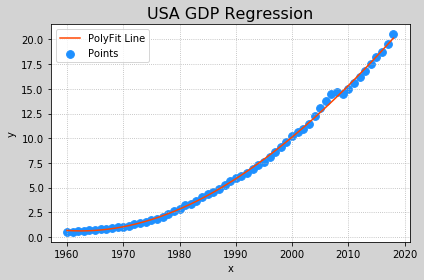

In [31]:
# 绘制多项式回归线
px = np.linspace(X.min(), X.max(), 1000)
px = px.reshape(-1, 1)
pred_py = model.predict(px)

# 绘制图像
mp.figure("美国历年GDP拟合结果", facecolor='lightgray')
mp.title('USA GDP Regression', fontsize=16)
mp.tick_params(labelsize=10)
mp.grid(linestyle=':')
mp.xlabel('x')
mp.ylabel('y')

mp.scatter(X, y, s=60, marker='o', c='dodgerblue', label='Points')
mp.plot(px, pred_py, c='orangered', label='PolyFit Line')
mp.tight_layout()
mp.legend()
mp.show()

In [32]:
# 中国
y = china_gdp
model = pl.make_pipeline(
    sp.PolynomialFeatures(5),  # 多项式特征拓展器
    lm.LinearRegression()  # 线性回归器
)
# 训练模型
model.fit(X, y)
# 求预测值y
pred_y = model.predict(X)

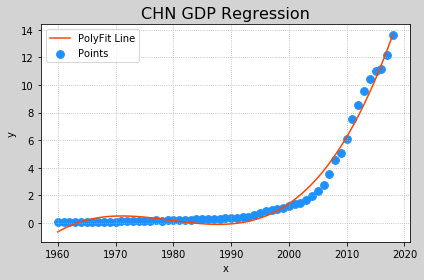

In [33]:
# 绘制多项式回归线
px = np.linspace(X.min(), X.max(), 1000)
px = px.reshape(-1, 1)
pred_py = model.predict(px)

# 绘制图像
mp.figure("中国历年GDP拟合结果", facecolor='lightgray')
mp.title('CHN GDP Regression', fontsize=16)
mp.tick_params(labelsize=10)
mp.grid(linestyle=':')
mp.xlabel('x')
mp.ylabel('y')

mp.scatter(X, y, s=60, marker='o', c='dodgerblue', label='Points')
mp.plot(px, pred_py, c='orangered', label='PolyFit Line')
mp.tight_layout()
mp.legend()
mp.show()